<a href="https://colab.research.google.com/github/dlyrikz/DeepLearning/blob/CNN/CNN_for_Binary_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Installation and Setup


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#print(tf.__version__)

# Step 2: Importing Datrasets

In [ ]:
# Installing Kaggle API
! pip install kaggle

In [ ]:
# create a directory
! mkdir -p ~/.kaggle

In [ ]:
# Import API Key to Colab
from google.colab import files
uploaded = files.upload()

In [ ]:
# Copy key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [ ]:
# Disable API Key
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Check list of datasets
! kaggle datasets list

In [ ]:
# Importing datasets from Kaggle
! kaggle datasets download -d tongpython/cat-and-dog

In [ ]:
# Unzip dataset
! unzip -q /content/cat-and-dog.zip

# Step 3: Building the Model

In [ ]:
# Define an object
model = tf.keras.models.Sequential()  # sequence of Layers

In [ ]:
# Adding 1st CNN layer (input layer)
# 1) filters (kernel) = 64
# 2) kernel size = 3 
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu',input_shape=[32,32,3]))

In [ ]:
# Adding Max Pool Layer
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

In [ ]:
# Adding 2nd CNN layer
# 1) filters (kernel) = 64
# 2) kernel size = 3 
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))

# Specify Max Pool Layer parameters
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

In [ ]:
# Adding the Flatten Layer  ** Converted array to vectors
model.add(tf.keras.layers.Flatten())

In [ ]:
# Adding the Dropout Layer
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
# Add the Fully Connected Layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
# Add Output Layer
# 1) units = 1
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Compiling the model
# 1) Optimizer - adam, (minimize the loss function)
# 2) loss function = binary__crossentropy (acts as guide to optimizer)
# 3) matrices = sparse_categorical_accuracy  ***Tip for Binary use accuracy

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Fitting CNN to images

In [ ]:
# Import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [ ]:
# Rescale the images
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32,32), classes=['dogs','cats'],
                                           class_mode='binary', batch_size=20)

test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32,32), classes=['dogs','cats'],
                                           class_mode='binary', batch_size=20)

In [ ]:
len(training_set), len(test_set)

In [ ]:
len(training_set) * 20, len(test_set) * 20

In [ ]:
# Training Model
history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)

# Step 5: Plotting the learning curve

In [66]:
import matplotlib.patches as mpatches
def learning_curve(history, epoch):

  #training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'], label='Train')
  plt.plot(epoch_range, history.history['val_accuracy'], label='Accuracy')
  plt.title('Model Accuracy')
  plt.ylabel('accu')
  plt.xlabel('times')
  plt.legend(loc='upper left')
  plt.show()

  #training vs validation loss

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'], label="Train")
  plt.plot(epoch_range, history.history['val_loss'], label="Loss")
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='upper left')
  plt.show()

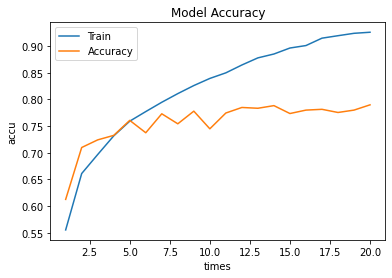

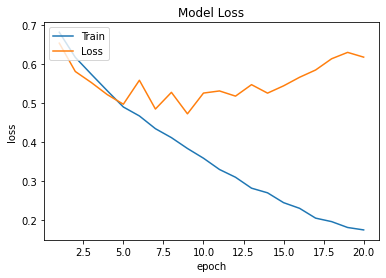

In [67]:
learning_curve(history, 20)